In [7]:
# load required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle


In [2]:
# load the data 
housing_data = pd.read_csv('housing_cleaned.csv')
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [3]:
# split into input feautures and targest features
X = housing_data.iloc[:,:-1]
y = housing_data.iloc[:,-1]

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# initialize the scaling function
scaler = StandardScaler()

# standardize the test and train data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



#### Linear Regression

In [4]:
# initiallize the regression model
regression = LinearRegression()

# fit a regression model to the data
regression.fit(X_train, y_train)

LinearRegression()

In [5]:
# Extract coefficients and intercept
coefficients = regression.coef_
intercept = regression.intercept_

# Print coefficients and intercept
print("Coefficients:")
print(coefficients)
print("\nIntercept:")
print(intercept)

Coefficients:
[-0.72111722  0.51080934 -0.10319542  0.80786973 -1.82778395  3.3491517
 -0.26833392 -3.04071452  0.16027255 -1.81471489  1.06317646 -3.52696164]

Intercept:
22.796534653465343


In [6]:
# make prediction on the test data 
predictions = regression.predict(X_test)

# calculate performance metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print performance metrics
print("\nPerformance Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


Performance Metrics:
R-squared: 0.6390
Mean Absolute Error: 3.3559
Mean Squared Error: 26.4709
Root Mean Squared Error: 5.1450


#### Interpretation of results: 
- R-Squared: Approximately 63.9% of the variance in the target variable is explained by the model. This suggests a moderately strong relationship between the predictors and the outcome. However, there is still room for imporovement/

- MAE: The value of 3.3559 indicates that, on average, the predictions are off by about 3.36 units from the actual values. 

- MSE: A value of 26.4709 suggests that the average squared difference between the predicted and actual values is 26.4709 units.

- RMSE: The value suggests that on average, the predictions deviate from the actual values by about 5.15 units.


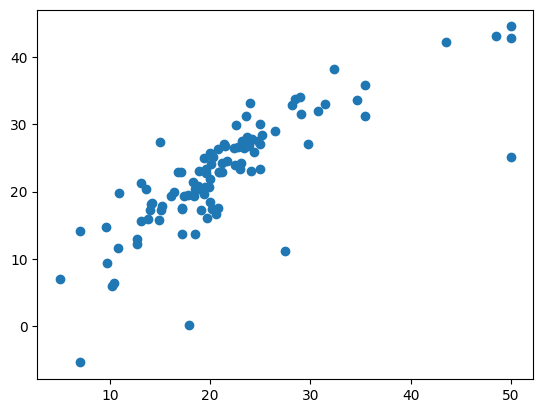

In [20]:
# plot a scatter plot for actual versus predicted 
plt.scatter(y_test,predictions)

> There is a strong correlation between the actual and predicted values, though there are few outliers

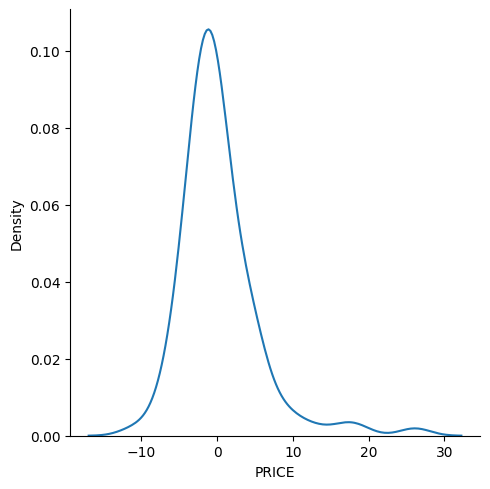

In [8]:
# calculate the residuals
residuals = y_test - predictions

# create a plot for the residuals 
sns.displot(residuals, kind = "kde")

> The residuals are approximately normal, This satisfy the assumption of normal distribution

#### Model Deployment Files

In [9]:
# create a pickle file for standardizing the features
pickle.dump(scaler,open('scaling.pkl','wb'))

# create a pickle file for the regression model 
pickle.dump(regression,open('regression_model.pkl','wb'))